# Time Series Linear Regression Project
- Sarah DeConink
- 06/22/2023

## Section 0-Setup

In [1]:
# enable the Matplotlib support
%matplotlib inline

In [2]:
# create a function to calculate the Celcius equivalents of the Fahrenheit temps
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

### Display the linear relationship between the Fahrenheit and Celsius temperatures

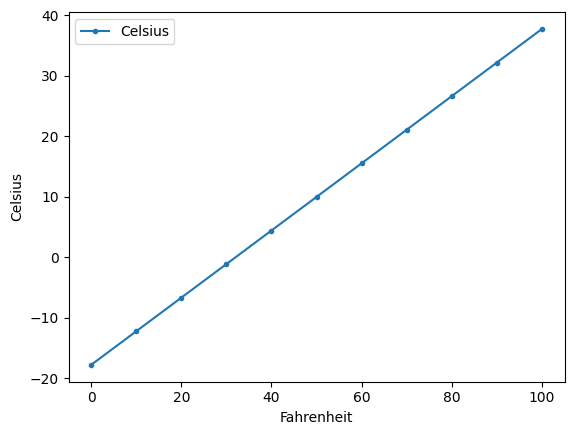

In [4]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')


## Section 1-Load Data

In [6]:
# Load the dataset
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2-View Data

In [9]:
# View the first five rows of the data
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [10]:
# View the last five rows of the data
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3-Clean Data

In [12]:
# Clean the data
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [13]:
# Check the type
nyc.Date.dtype

dtype('int64')

In [14]:
# Truncate last two digits of Date
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4-Descriptive Data

In [16]:
#Set precision to 2 decimal places
pd.set_option('display.precision', 2)

# Descriptive stats
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5-Predict Avg High Temp for Jan 2026

In [17]:
# import modules
from scipy import stats

# use linear regression
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [18]:
# display the slope
linear_regression.slope

0.014771361132966163

In [19]:
# display the intercept
linear_regression.intercept

8.694993233674289

In [20]:
# predict the 2026 value
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Section 6-Scatter Plot

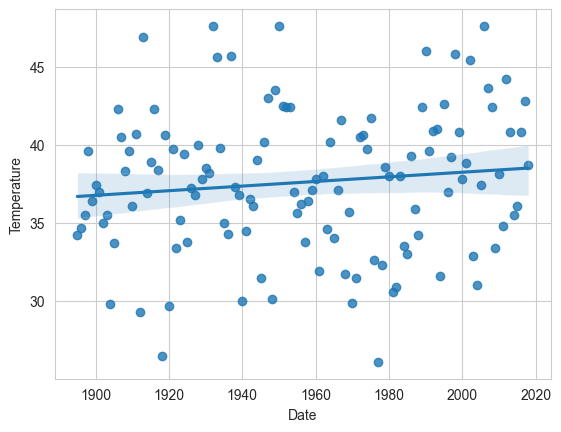

In [22]:
# setup
import seaborn as sns

sns.set_style('whitegrid')

# scatter plot
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

(10.0, 70.0)

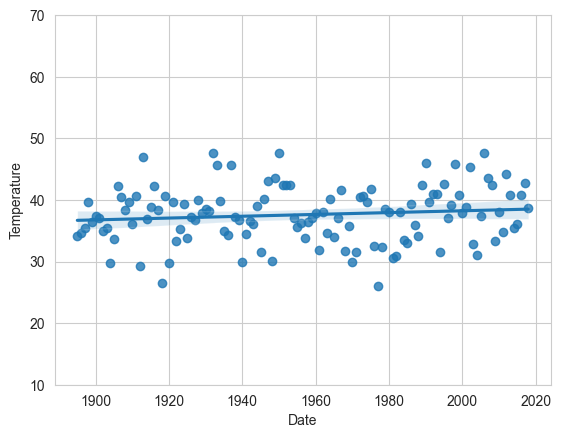

In [41]:
# scale the graph
sns.regplot(x=nyc.Date, y=nyc.Temperature).axes.set_ylim(10, 70)

# Machine Learning Approach

## Section 1-Split Data

In [42]:
#import modules
from sklearn.model_selection import train_test_split

# split the data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [44]:
# confirm 75%-%25 split fot train-test data
X_train.shape

(93, 1)

In [45]:
# confirm 75%-%25 split fot train-test data
X_test.shape

(31, 1)

## Train the Model

In [48]:
# import modules
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [49]:
# find the slope
linear_regression.coef_

array([0.01939167])

In [51]:
# find the intercept
linear_regression.intercept_

-0.30779820252656265

## Test the Model

In [52]:
# compare the predicted and expected values every fifth value
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predict Avg High Temp for Jan 2026

In [53]:
# create a prediction function
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2026)

array([38.97973189])

## Display the Dataset with Regression Line

<Axes: xlabel='Date', ylabel='Temperature'>

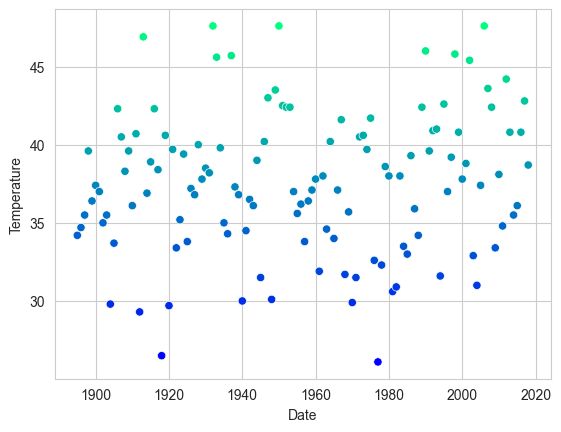

In [57]:
import seaborn as sns

# display the scatter plot
sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

(10.0, 70.0)

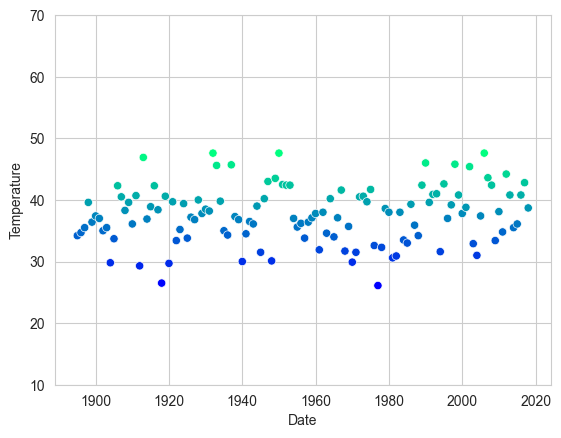

In [58]:
# adjust the y axis

sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False).axes.set_ylim(10, 70)

### Add the Regression Line

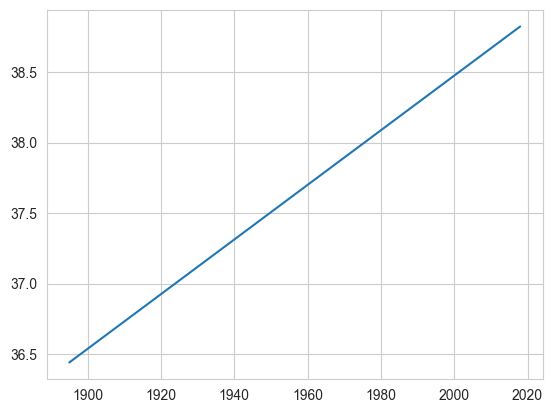

In [62]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# x-coordinates of the start and end
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

# array of y-coordinates
y = predict(x)

# display regression line
line = plt.plot(x, y)

(10.0, 70.0)

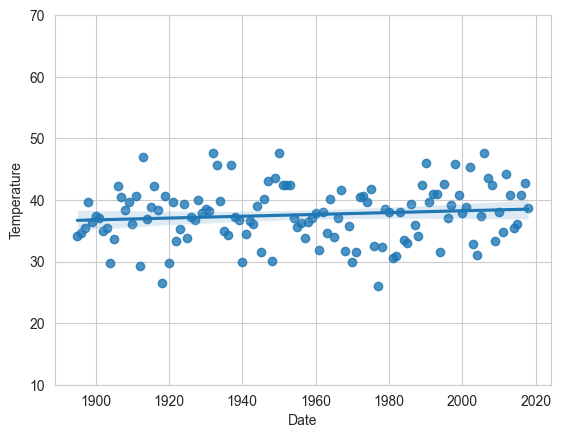

In [63]:
sns.regplot(x=nyc.Date, y=nyc.Temperature).axes.set_ylim(10, 70)

# Conclusions

#### The Linear Regression Method used data to find the slope and intercept and then predicted the average January high temperature for 2026 (38.6218 degrees) using the the regression line. The Machine Learning method used some of the data to train and test a model, then the average January high temperature for 2026 (38.9797) was predicted using the mode. Both methods yielded very similar results.